In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
import torch
import os
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score



In [2]:
# csv_files = glob.glob("*.binetflow") 
# all_df = []
# for file in csv_files:
#     df = pd.read_csv(file)
#     all_df.append(df)
# combined_df = pd.concat(all_df, ignore_index=True)
# df = combined_df
df = pd.read_csv('ctu-13-1.binetflow')
df1 = df

In [3]:
df.to_csv('out.csv', index=False)  

In [4]:
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824631,2011/08/10 15:54:07.352393,0.000393,udp,147.32.86.92,36363,<->,147.32.80.9,53,CON,0.0,0.0,2,208,79,flow=To-Background-UDP-CVUT-DNS-Server
2824632,2011/08/10 15:54:07.353854,0.000935,udp,58.165.41.84,60122,<->,147.32.84.229,13363,CON,0.0,0.0,2,539,75,flow=Background-UDP-Established
2824633,2011/08/10 15:54:07.357302,0.000000,tcp,147.32.84.171,47077,->,78.191.168.43,13754,S_,0.0,NaN,1,74,74,flow=Background-TCP-Attempt
2824634,2011/08/10 15:54:07.366830,0.002618,udp,93.79.39.15,10520,<->,147.32.84.229,13363,CON,0.0,0.0,2,520,460,flow=Background-UDP-Established


In [5]:
df.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [6]:
nan_count_col1 = df['Label'].isna().sum()
print(f"NaN count in col1: {nan_count_col1}")

NaN count in col1: 0


In [7]:
df.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
labels = df['Label'].astype(str)
df['Label'] = labels

substring = 'botnet'
replacement = 'Botnet'
replacement_else = 'Safe'

for index in range(len(df)):
    if substring in df.loc[index, 'Label'].lower():  
        df.loc[index, 'Label'] = replacement
    else:
        df.loc[index, 'Label'] = replacement_else

In [9]:
le = LabelEncoder()
df.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
labels = df['Label'].astype(str)  
features = df.drop(columns=['Label'])  
df = df.drop(columns=['Label'])
features_array = features.to_numpy()
labels_array = labels.to_numpy()


In [11]:
df.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
dtype: object

In [ ]:
le = LabelEncoder()
df['StartTime'] = le.fit_transform(df['StartTime'])
df['Proto'] = le.fit_transform(df['Proto']) 
df['SrcAddr'] = le.fit_transform(df['SrcAddr'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Dir'] = le.fit_transform(df['Dir'])
df['DstAddr'] = le.fit_transform(df['DstAddr'])
df['Dport'] = le.fit_transform(df['Dport'])
df['State'] = le.fit_transform(df['State'])

print(df)

         StartTime       Dur  Proto  SrcAddr  Sport  Dir  DstAddr  Dport  \
0             1571  1.026539     11   505974   6374    0    21316  70633   
1             1845  1.009595     11   505974   6374    0    21316  70633   
2             9871  3.056586     11    86960  41592    0    77982  71762   
3             9891  3.111769     11    86960  41813    0    77982  71762   
4            10036  3.083411     11    86960  42497    0    77982  71762   
...            ...       ...    ...      ...    ...  ...      ...    ...   
2824631    2824631  0.000393     12    86961  29109    3    21100  56655   
2824632    2824632  0.000935     12   255324  55302    3    21250  13005   
2824633    2824633  0.000000     11    86764  40927    0    79629  13437   
2824634    2824634  0.002618     12   492849    571    3    21250  13005   
2824635    2824635  0.001122     12   330828  21447    3    21250  13005   

         State  sTos  dTos  TotPkts  TotBytes  SrcBytes  
0          203   0.0   0.0   

In [13]:
features_array = df.to_numpy()
# df

In [14]:
print(labels)

0          Safe
1          Safe
2          Safe
3          Safe
4          Safe
           ... 
2824631    Safe
2824632    Safe
2824633    Safe
2824634    Safe
2824635    Safe
Name: Label, Length: 2824636, dtype: object


In [ ]:
le = LabelEncoder()
le.fit(labels)
if labels.dtype == 'object':  
    labels_encoded = le.transform(labels)
else:
    labels_encoded = labels.to_numpy()
    
# Convert to PyTorch tensors
features_tensor = torch.tensor(features_array, dtype=torch.float32)
labels_tensor = torch.tensor(labels_encoded, dtype=torch.long)

# Verify
print(f"Features tensor shape: {features_tensor.shape}")
print(f"Labels tensor shape: {labels_tensor.shape}")

#print("Original labels:", labels)
print("Encoded labels:", labels_encoded)
print("Classes (mapping):", le.classes_)

Features tensor shape: torch.Size([2824636, 14])
Labels tensor shape: torch.Size([2824636])
Encoded labels: [1 1 1 ... 1 1 1]
Classes (mapping): ['Botnet' 'Safe']


In [16]:
neg,pos = np.bincount(labels_encoded)
total = neg + pos

print('Examples:\n     Total: {}\n      Positive: {}  ({:.2f}% of total)\n'.format(total, pos, 100*pos/total))

Examples:
     Total: 2824636
      Positive: 2783675  (98.55% of total)



In [ ]:
features_normalized = features_array

features_tensor = torch.tensor(features_normalized, dtype=torch.float32)

In [18]:
features_normalized

array([[1.571000e+03, 1.026539e+00, 1.100000e+01, ..., 4.000000e+00,
        2.760000e+02, 1.560000e+02],
       [1.845000e+03, 1.009595e+00, 1.100000e+01, ..., 4.000000e+00,
        2.760000e+02, 1.560000e+02],
       [9.871000e+03, 3.056586e+00, 1.100000e+01, ..., 3.000000e+00,
        1.820000e+02, 1.220000e+02],
       ...,
       [2.824633e+06, 0.000000e+00, 1.100000e+01, ..., 1.000000e+00,
        7.400000e+01, 7.400000e+01],
       [2.824634e+06, 2.618000e-03, 1.200000e+01, ..., 2.000000e+00,
        5.200000e+02, 4.600000e+02],
       [2.824635e+06, 1.122000e-03, 1.200000e+01, ..., 2.000000e+00,
        1.370000e+02, 7.700000e+01]])

In [19]:
unique_names = labels.nunique()
labels.unique

<bound method Series.unique of 0          Safe
1          Safe
2          Safe
3          Safe
4          Safe
           ... 
2824631    Safe
2824632    Safe
2824633    Safe
2824634    Safe
2824635    Safe
Name: Label, Length: 2824636, dtype: object>

In [20]:
print(unique_names)

2


In [21]:
print(f"Features tensor:\n{features_tensor[:5]}")
print(f"Labels tensor:\n{labels_tensor[:5]}")

Features tensor:
tensor([[1.5710e+03, 1.0265e+00, 1.1000e+01, 5.0597e+05, 6.3740e+03, 0.0000e+00,
         2.1316e+04, 7.0633e+04, 2.0300e+02, 0.0000e+00, 0.0000e+00, 4.0000e+00,
         2.7600e+02, 1.5600e+02],
        [1.8450e+03, 1.0096e+00, 1.1000e+01, 5.0597e+05, 6.3740e+03, 0.0000e+00,
         2.1316e+04, 7.0633e+04, 2.0300e+02, 0.0000e+00, 0.0000e+00, 4.0000e+00,
         2.7600e+02, 1.5600e+02],
        [9.8710e+03, 3.0566e+00, 1.1000e+01, 8.6960e+04, 4.1592e+04, 0.0000e+00,
         7.7982e+04, 7.1762e+04, 1.9300e+02, 0.0000e+00, 0.0000e+00, 3.0000e+00,
         1.8200e+02, 1.2200e+02],
        [9.8910e+03, 3.1118e+00, 1.1000e+01, 8.6960e+04, 4.1813e+04, 0.0000e+00,
         7.7982e+04, 7.1762e+04, 1.9300e+02, 0.0000e+00, 0.0000e+00, 3.0000e+00,
         1.8200e+02, 1.2200e+02],
        [1.0036e+04, 3.0834e+00, 1.1000e+01, 8.6960e+04, 4.2497e+04, 0.0000e+00,
         7.7982e+04, 7.1762e+04, 1.9300e+02, 0.0000e+00, 0.0000e+00, 3.0000e+00,
         1.8200e+02, 1.2200e+02]])
La

In [ ]:
train_ratio = 0.8
train_size = int(train_ratio * len(features_tensor))

train_features = features_tensor[:train_size]
test_features = features_tensor[train_size:]

train_labels = labels_tensor[:train_size]
test_labels = labels_tensor[train_size:]

In [23]:
train_features_np = train_features.numpy()
train_labels_np = train_labels.numpy()
test_features_np = test_features.numpy()
test_labels_np = test_labels.numpy()


In [24]:
neg,pos = np.bincount(train_labels_np)
total = neg + pos

print('Examples:\n  Total: {}\n     Positive: {}  ({:.2f}% of total)\n'.format(total, pos, 100*pos/total))

Examples:
  Total: 2259708
     Positive: 2229037  (98.64% of total)



In [25]:
train_features_np.shape

(2259708, 14)

In [26]:
print("Unique labels:", np.unique(train_labels_np))
print("Label range:", np.min(train_labels_np), np.max(train_labels_np))


Unique labels: [0 1]
Label range: 0 1


In [27]:
print(len(np.unique(train_labels_np)))
n_outputs = train_labels_np.shape
unique_labels = np.unique(train_labels_np)
print(n_outputs)

2
(2259708,)


In [28]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_np), y=train_labels_np)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model = tf.keras.models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(14,), kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features_np, train_labels_np,batch_size=1000, epochs=10, verbose=1,
                    validation_data=(test_features_np, test_labels_np), class_weight=class_weight_dict)

test_loss, test_acc = model.evaluate(test_features_np, test_labels_np, verbose=2)
print(f"Test accuracy: {test_acc}")
# model.save('testing_b.h5')


Epoch 1/10


2260/2260 [==============================] - 15s 4ms/step - loss: nan - accuracy: 0.5322 - val_loss: nan - val_accuracy: 0.9818
Epoch 2/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.5085 - val_loss: nan - val_accuracy: 0.0182
Epoch 3/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.5122 - val_loss: nan - val_accuracy: 0.0182
Epoch 4/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.4485 - val_loss: nan - val_accuracy: 0.9818
Epoch 5/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.5599 - val_loss: nan - val_accuracy: 0.0182
Epoch 6/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.4957 - val_loss: nan - val_accuracy: 0.0182
Epoch 7/10
2260/2260 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.5012 - val_loss: nan - val_accuracy: 0.0182
Epoch 8/10
2260/2260 [========

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2177 (8.5

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_features_np, train_labels_np)
print("Feature importances:", rf.feature_importances_)

Feature importances: [2.64863703e-02 4.24892047e-02 8.07016671e-03 3.81665860e-01
 1.84826303e-01 2.96208336e-03 1.11523760e-01 7.99949676e-02
 1.70354324e-02 1.25726395e-06 5.85493196e-03 3.57299972e-02
 3.65962971e-02 6.67633686e-02]


In [32]:
df1.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
df1 = df1.dropna()

In [34]:
df1

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Safe
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,Safe
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Safe
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Safe
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824630,2011/08/10 15:54:07.352387,0.000330,udp,147.32.86.92,36363,<->,147.32.80.9,53,CON,0.0,0.0,2,296,79,Safe
2824631,2011/08/10 15:54:07.352393,0.000393,udp,147.32.86.92,36363,<->,147.32.80.9,53,CON,0.0,0.0,2,208,79,Safe
2824632,2011/08/10 15:54:07.353854,0.000935,udp,58.165.41.84,60122,<->,147.32.84.229,13363,CON,0.0,0.0,2,539,75,Safe
2824634,2011/08/10 15:54:07.366830,0.002618,udp,93.79.39.15,10520,<->,147.32.84.229,13363,CON,0.0,0.0,2,520,460,Safe


In [ ]:
labels = le.fit_transform(df1['Label']).astype(int)  
features = df1.drop(columns=['Label'])

In [ ]:
numeric_features = ['Dur', 'sTos', 'dTos', 'TotPkts','TotBytes','SrcBytes']
categorical_features = ['StartTime','Proto', 'SrcAddr','Sport','Dir','DstAddr','Dport','State']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = preprocessor.fit_transform(df1[numeric_features + categorical_features])
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)

X_train shape: (2095472, 3338655), y_train shape: (2095472,)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=50,           
    max_depth=5,               
    n_jobs=-1,                 
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)

c:\Users\espac\miniconda3\envs\islp\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\espac\miniconda3\envs\islp\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\espac\miniconda3\envs\islp\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Botnet       0.00      0.00      0.00      5625
        Safe       0.99      1.00      0.99    518243

    accuracy                           0.99    523868
   macro avg       0.49      0.50      0.50    523868
weighted avg       0.98      0.99      0.98    523868

ROC-AUC: 0.5882


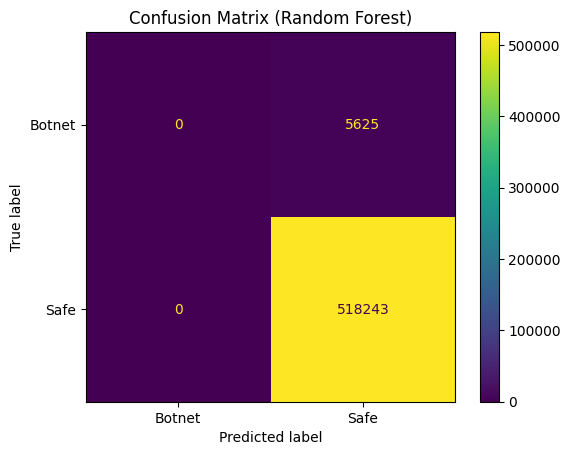

In [ ]:
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_test = imputer.fit_transform(X_test)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print(classification_report(y_test, y_pred, target_names=['Botnet', 'Safe']))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])
cm_display.plot()
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=50,           
    max_depth=5,               
    class_weight='balanced',    
    n_jobs=-1,                  
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

      Botnet       0.85      0.17      0.29      5625
        Safe       0.99      1.00      1.00    518243

    accuracy                           0.99    523868
   macro avg       0.92      0.59      0.64    523868
weighted avg       0.99      0.99      0.99    523868

ROC-AUC: 0.6041


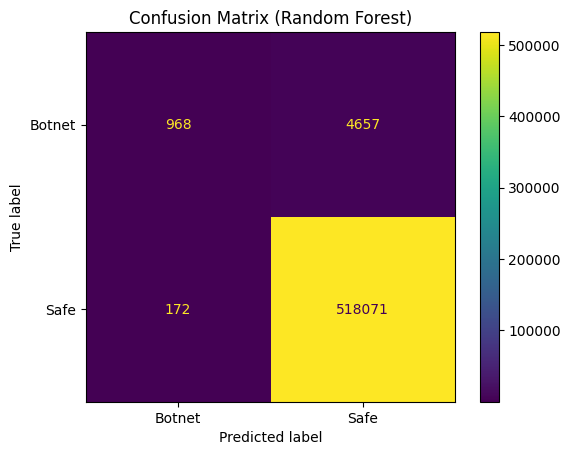

In [ ]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  

print(classification_report(y_test, y_pred, target_names=["Botnet", "Safe"]))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])
cm_display.plot()
plt.title('Confusion Matrix (Random Forest)')
plt.show()

              precision    recall  f1-score   support

      Botnet   0.849123  0.172089  0.286179      5625
        Safe   0.991091  0.999668  0.995361    518243

    accuracy                       0.990782    523868
   macro avg   0.920107  0.585878  0.640770    523868
weighted avg   0.989567  0.990782  0.987746    523868

ROC-AUC: 0.6041


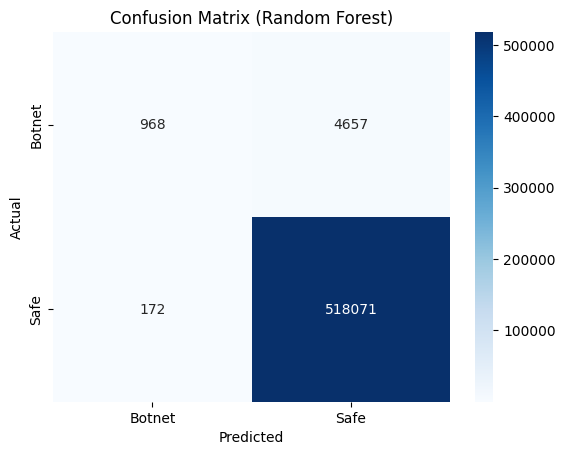

In [ ]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print(classification_report(y_test, y_pred, target_names=['Botnet', 'Safe'], digits=6))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Botnet', 'Safe'], yticklabels=['Botnet', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [ ]:
from joblib import dump, load  

dump(rf_model, 'random_forest_ctu13.joblib') 
dump(preprocessor, 'preprocessor_with_rf.joblib')

['preprocessor_with_rf.joblib']

In [ ]:
rf_model = load('random_forest_ctu13.joblib')  

single_flow = X_test[0:1]  

_ = rf_model.predict(single_flow)

n_runs = 1000
latencies = []
for _ in range(n_runs):
    start_time = time.perf_counter()  
    _ = rf_model.predict(single_flow)
    end_time = time.perf_counter()
    latencies.append((end_time - start_time) * 1000)  
    
print(f"Mean latency per flow: {np.mean(latencies):.4f} ms")
print(f"Std deviation: {np.std(latencies):.4f} ms")
print(f"Max latency: {np.max(latencies):.4f} ms")

Mean latency per flow: 134.5318 ms
Std deviation: 39.5993 ms
Max latency: 1356.2112 ms


In [48]:
# selected_indices = [i for i, imp in enumerate(rf.feature_importances_) if imp > 0.05]
selected_indices = [3,4,6,7, 13]
train_features_reduced = train_features_np[:, selected_indices]
test_features_reduced = test_features_np[:, selected_indices]

In [49]:
test_features_reduced.shape

(564928, 5)

In [50]:
test_features_reduced.shape[1]

5

In [51]:
test_features_reduced

array([[8.68560e+04, 4.65820e+04, 2.11000e+04, 5.66550e+04, 7.90000e+01],
       [8.68560e+04, 4.71300e+04, 2.11000e+04, 5.66550e+04, 6.60000e+01],
       [8.68560e+04, 3.40670e+04, 2.11000e+04, 5.66550e+04, 7.90000e+01],
       ...,
       [8.67640e+04, 4.09270e+04, 7.96290e+04, 1.34370e+04, 7.40000e+01],
       [4.92849e+05, 5.71000e+02, 2.12500e+04, 1.30050e+04, 4.60000e+02],
       [3.30828e+05, 2.14470e+04, 2.12500e+04, 1.30050e+04, 7.70000e+01]],
      dtype=float32)

In [52]:
train_features_reduced

array([[5.05974e+05, 6.37400e+03, 2.13160e+04, 7.06330e+04, 1.56000e+02],
       [5.05974e+05, 6.37400e+03, 2.13160e+04, 7.06330e+04, 1.56000e+02],
       [8.69600e+04, 4.15920e+04, 7.79820e+04, 7.17620e+04, 1.22000e+02],
       ...,
       [8.68560e+04, 2.79010e+04, 2.11000e+04, 5.66550e+04, 7.90000e+01],
       [8.68560e+04, 3.14580e+04, 2.11000e+04, 5.66550e+04, 6.60000e+01],
       [2.95903e+05, 2.71660e+04, 2.12500e+04, 1.30050e+04, 7.50000e+01]],
      dtype=float32)

In [53]:
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
initial_learning_rate = 0.01
decay_steps = 1000
decay_rate = 0.9

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6)

In [56]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [57]:
len(train_features_np)//64

35307

In [58]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01)),
# tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.3),
# tf.keras.layers.Dense(128, activation='relu'),
# tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(16, activation='relu'),
# tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Nadam()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_features_reduced, train_labels_np,batch_size=1024, epochs=10, verbose=1,
                    validation_data=(test_features_reduced, test_labels_np), class_weight=class_weight_dict,callbacks=[early_stop])
# Evaluate the model ,reduce_lr
test_loss, test_acc = model.evaluate(test_features_reduced, test_labels_np, verbose=1)
print(f"Test accuracy: {test_acc}")
# model.save('testing_prototype_2.h5')
#

Epoch 1/10
2207/2207 [==============================] - 12s 4ms/step - loss: 104.6784 - accuracy: 0.4879 - val_loss: 0.5888 - val_accuracy: 0.4162
Epoch 2/10
2207/2207 [==============================] - 10s 5ms/step - loss: 1.0774 - accuracy: 0.3386 - val_loss: 0.6180 - val_accuracy: 0.4149
Epoch 3/10
17654/17654 [==============================] - 31s 2ms/step - loss: 0.6267 - accuracy: 0.3946
Test accuracy: 0.3945600092411041


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
y_pred_probs = model.predict(test_features_reduced)

17654/17654 [==============================] - 25s 1ms/step


In [61]:
y_pred_binary = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(test_labels_np, y_pred_binary)

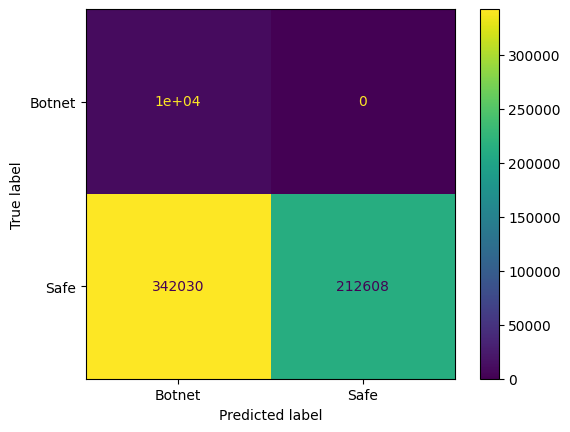

In [62]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])

cm_display.plot()
plt.show()

In [63]:
# False Positive Rate (FPR): FP / (FP + TN)
tn, fp, fn, tp = confusion_matrix(test_labels_np, y_pred_binary).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)


In [ ]:
# model.save('testing_prototype_4.h5')
# model.save('testing_prototype_4.keras')

y_true = test_labels_np
y_pred_class = (y_pred_probs >= 0.5).astype(int)  # Threshold at 0.5


print("Precision:", precision_score(y_true, y_pred_class))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_true, y_pred_class))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_probs))

Precision: 1.0
TPR (Recall): 0.3833
FPR: 0.0000
F1-Score: 0.554210774640728
AUC-ROC: 0.6917052203419167


In [ ]:
import time

start = time.time()
y_pred = model.predict(test_features_reduced, batch_size=1024)  
latency_ms = (time.time() - start) * 1000 / len(test_features_reduced)
print(f"Latency: {latency_ms:.6f} ms/flow")

552/552 [==============================] - 1s 2ms/step
Latency: 0.002536 ms/flow


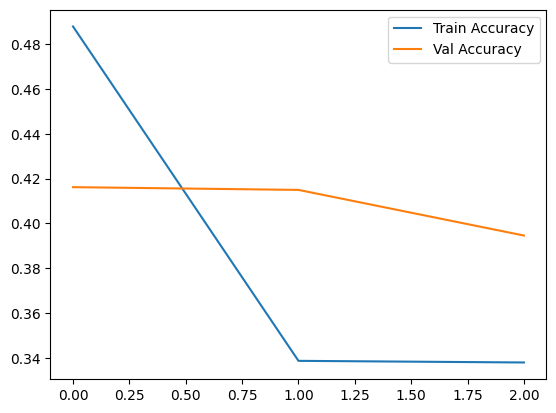

In [66]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

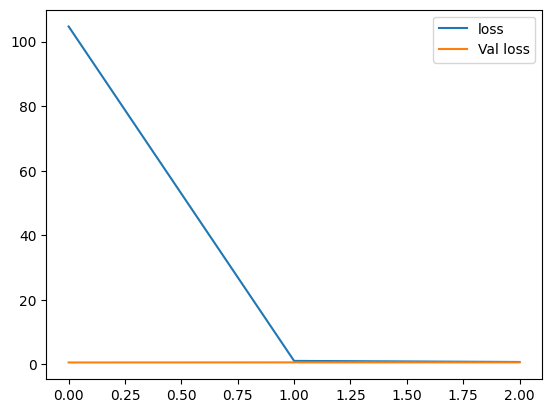

In [67]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

In [68]:
# model.save('testing_prototype_1.h5')
# model.save('testing_prototype_1.keras')

17654/17654 [==============================] - 26s 1ms/step


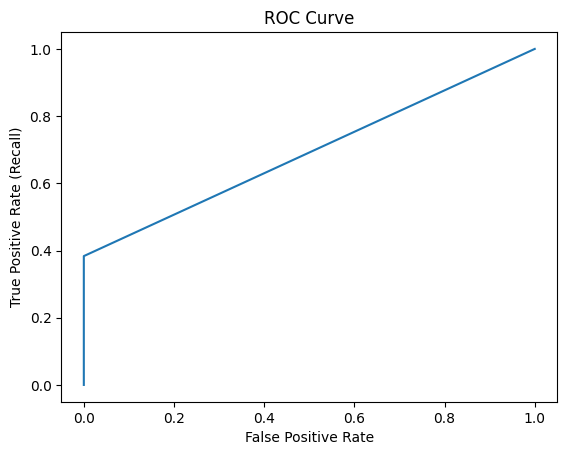

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_scores = model.predict(test_features_reduced).flatten()  

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Nadam()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features_reduced, train_labels_np,batch_size=1024, epochs=10, verbose=1,
                    validation_data=(test_features_reduced, test_labels_np), class_weight=class_weight_dict,callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_features_reduced, test_labels_np, verbose=1)
print(f"Test accuracy: {test_acc}")
# model.save('testing_prototype_2.h5')
#

Epoch 1/10
2207/2207 [==============================] - 17s 6ms/step - loss: 0.2409 - accuracy: 0.9022 - val_loss: 0.1164 - val_accuracy: 0.9624
Epoch 2/10
2207/2207 [==============================] - 14s 6ms/step - loss: 0.1600 - accuracy: 0.9407 - val_loss: 0.0835 - val_accuracy: 0.9870
Epoch 3/10
2207/2207 [==============================] - 13s 6ms/step - loss: 0.1456 - accuracy: 0.9440 - val_loss: 0.1065 - val_accuracy: 0.9662
Epoch 4/10
17654/17654 [==============================] - 32s 2ms/step - loss: 0.0931 - accuracy: 0.9698
Test accuracy: 0.9697625041007996


In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 batch_normalization_5 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [93]:
y_pred_probs = model.predict(test_features_reduced)

17654/17654 [==============================] - 28s 2ms/step


In [94]:
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

cm = confusion_matrix(test_labels_np, y_pred_binary)

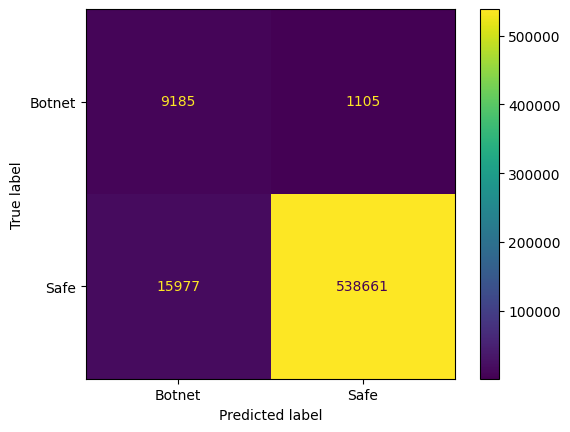

In [95]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])

cm_display.plot()
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_labels_np, y_pred_binary).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)


In [ ]:
# model.save('testing_prototype_4.h5')
# model.save('testing_prototype_4.keras')

y_true = test_labels_np
y_pred_class = (y_pred_probs >= 0.5).astype(int)  


print("Precision:", precision_score(y_true, y_pred_class))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_true, y_pred_class))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_probs))

Precision: 0.9979528165908931
TPR (Recall): 0.9712
FPR: 0.1074
F1-Score: 0.9843915044170161
AUC-ROC: 0.9906173364792265


In [ ]:
start = time.time()
y_pred = model.predict(test_features_reduced, batch_size=1024)  
latency_ms = (time.time() - start) * 1000 / len(test_features_reduced)
print(f"Latency: {latency_ms:.6f} ms/flow")

552/552 [==============================] - 1s 2ms/step
Latency: 0.002538 ms/flow


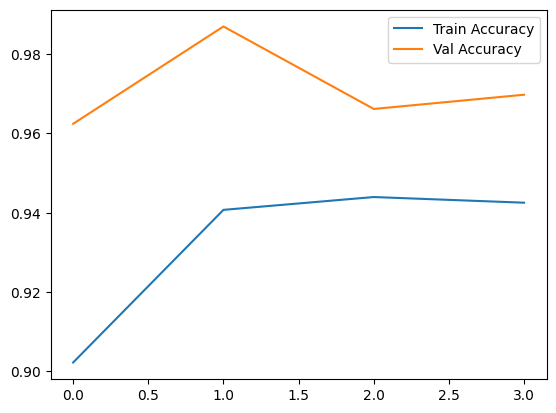

In [99]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

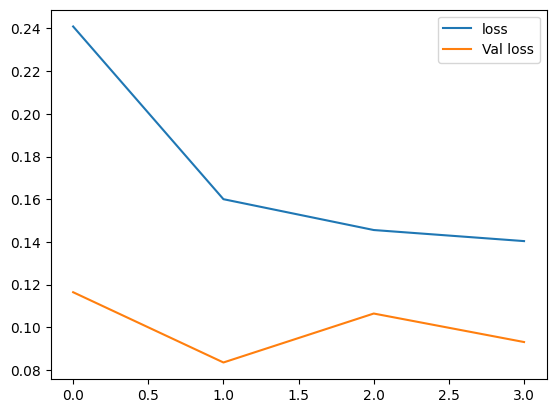

In [100]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

17654/17654 [==============================] - 28s 2ms/step


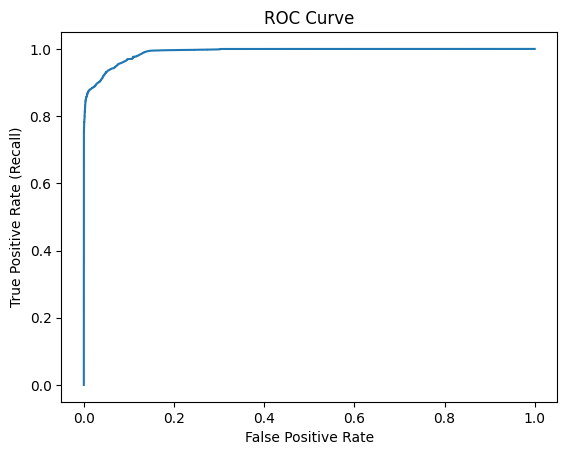

In [ ]:
from sklearn.metrics import roc_curve

y_scores = model.predict(test_features_reduced).flatten()  

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [102]:
# model = tf.keras.models.load_model('testing_prototype_1.keras')

In [103]:
tf.__version__

'2.15.0'

In [104]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity


In [109]:
def calculate_sparsity(model):
    total_zeros = 0
    total_weights = 0
    for layer in model.layers:
        for weight in layer.weights:
            if 'kernel' in weight.name:
                w = weight.numpy()
                total_zeros += np.count_nonzero(w == 0)
                total_weights += w.size
    return total_zeros / total_weights if total_weights > 0 else 0


In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0,
        final_sparsity=0.3,
        begin_step=0,
        end_step=2000
    )
}

pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

pruned_model.compile(
    optimizer='Nadam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tf.keras.callbacks.EarlyStopping(patience=1)  
]

pruned_model.fit(
    train_features_reduced,
    train_labels_np,
    epochs=100,
    batch_size = 1024,
    class_weight=class_weight_dict,
    validation_data=(train_features_reduced, train_labels_np),
    callbacks=callbacks  
)

Epoch 1/100
2207/2207 [==============================] - 20s 6ms/step - loss: 0.1351 - accuracy: 0.9442 - val_loss: 0.1107 - val_accuracy: 0.9470
Epoch 2/100
2207/2207 [==============================] - 16s 7ms/step - loss: 0.1276 - accuracy: 0.9470 - val_loss: 0.1128 - val_accuracy: 0.9433


In [111]:
print("Final model sparsity:", calculate_sparsity(pruned_model))

Final model sparsity: 0.3


In [ ]:
test_loss, test_acc = pruned_model.evaluate(test_features_reduced, test_labels_np, verbose=2)

17654/17654 - 24s - loss: 0.1106 - accuracy: 0.9438 - 24s/epoch - 1ms/step


In [113]:
pruned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_  (None, 64)                706       
 9 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_batch_  (None, 64)                257       
 normalization_4 (PruneLowM                                      
 agnitude)                                                       
                                                                 
 prune_low_magnitude_dropou  (None, 64)                1         
 t_4 (PruneLowMagnitude)                                         
                                                                 
 prune_low_magnitude_dense_  (None, 16)                2066      
 10 (PruneLowMagnitude)                                          
                                                      

In [114]:
pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

In [115]:
pruned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 batch_normalization_5 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [116]:
y_pred_probs = pruned_model.predict(test_features_reduced)

17654/17654 [==============================] - 28s 2ms/step


In [117]:
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

cm = confusion_matrix(test_labels_np, y_pred_binary)

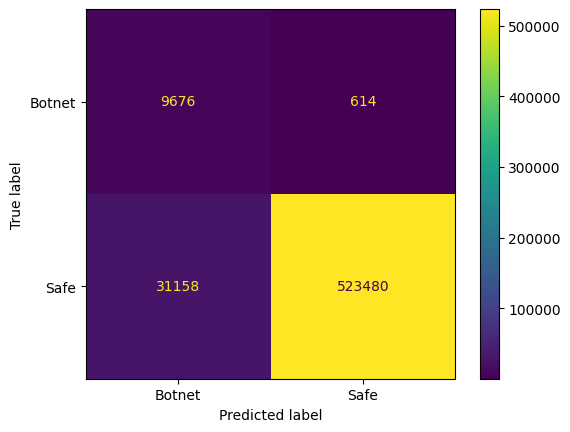

In [118]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])

cm_display.plot()
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_labels_np, y_pred_binary).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

In [ ]:
# model.save('testing_prototype_4.h5')
# model.save('testing_prototype_4.keras')

y_true = test_labels_np
y_pred_class = (y_pred_probs >= 0.5).astype(int)  #

print("Precision:", precision_score(y_true, y_pred_class))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_true, y_pred_class))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_probs))

Precision: 0.9988284544375627
TPR (Recall): 0.9438
FPR: 0.0597
F1-Score: 0.9705469013619694
AUC-ROC: 0.9916467197573366


In [ ]:
start = time.time()
y_pred = pruned_model.predict(test_features_reduced, batch_size=1024)  
latency_ms = (time.time() - start) * 1000 / len(test_features_reduced)
print(f"Latency: {latency_ms:.6f} ms/flow")

552/552 [==============================] - 1s 2ms/step
Latency: 0.003159 ms/flow


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] 
quantized_model = converter.convert()

with open('quantized.tflite', 'wb') as f:
    f.write(quantized_model)

pruned_model.save('pruned_model.h5')
model.save('original.h5')

INFO:tensorflow:Assets written to: C:\Users\espac\AppData\Local\Temp\tmpraw_u5bi\assets


INFO:tensorflow:Assets written to: C:\Users\espac\AppData\Local\Temp\tmpraw_u5bi\assets


c:\Users\espac\miniconda3\envs\islp\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [284]:
interpreter = tf.lite.Interpreter(model_content=quantized_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
print("Expected input shape:", input_details[0]['shape']) 

Expected input shape: [1 5]


In [ ]:
input_data = np.array([test_features_reduced[0]], dtype=np.float32) 
print("Your input shape:", input_data.shape) 

Your input shape: (1, 5)


In [286]:
interpreter = tf.lite.Interpreter(model_content=quantized_model)
interpreter.allocate_tensors()

print(f"Random Forest: {os.path.getsize('random_forest_ctu13.joblib') / 1024:.1f} KB")
print(f"Original: {os.path.getsize('original.h5') / 1024:.1f} KB")
print(f"Pruned: {os.path.getsize('pruned_model.h5') / 1024:.1f} KB")
print(f"Quantized: {os.path.getsize('quantized.tflite') / 1024:.1f} KB")


Random Forest: 74.1 KB
Original: 68.2 KB
Pruned: 35.8 KB
Quantized: 5.3 KB


In [ ]:
class TFLiteModel:
    def __init__(self, model_path):
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()

    def predict(self, X):
        results = []
        for sample in X:
            input_shape = self.input_details[0]['shape']
            input_data = np.array(sample, dtype=np.float32).reshape(input_shape)
            self.interpreter.set_tensor(self.input_details[0]['index'], input_data)
            self.interpreter.invoke()
            output = self.interpreter.get_tensor(self.output_details[0]['index'])
            results.append(output)
        return np.array(results).squeeze()  


In [288]:
quantized_model = TFLiteModel("quantized.tflite")

In [ ]:
X_test = test_features_reduced
y_pred = quantized_model.predict(X_test)     

y_pred_class = (y_pred >= 0.5).astype(int)

In [290]:
y_pred_pruned = pruned_model.predict(X_test)

y_pred_quant = quantized_model.predict(X_test)

print("pruned Accuracy:", accuracy_score(test_labels_np, y_pred_pruned >= 0.5))
print("Quantized Accuracy:", accuracy_score(test_labels_np, y_pred_quant >= 0.5))

17654/17654 [==============================] - 26s 1ms/step
pruned Accuracy: 0.9437592047128129
Quantized Accuracy: 0.9817852894528152


In [291]:
y_true = test_labels_np
tn, fp, fn, tp = confusion_matrix(test_labels_np, y_pred_quant).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

print("Precision:", precision_score(y_true, y_pred_quant))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_true, y_pred_quant))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_quant))

Precision: 0.9817852894528152
TPR (Recall): 1.0000
FPR: 1.0000
F1-Score: 0.9908089384636547
AUC-ROC: 0.5


In [ ]:
start = time.time()
y_pred = quantized_model.predict(test_features_reduced)  
latency_ms = (time.time() - start) * 1000 / len(test_features_reduced)
print(f"Latency: {latency_ms:.6f} ms/flow")

Latency: 0.010799 ms/flow


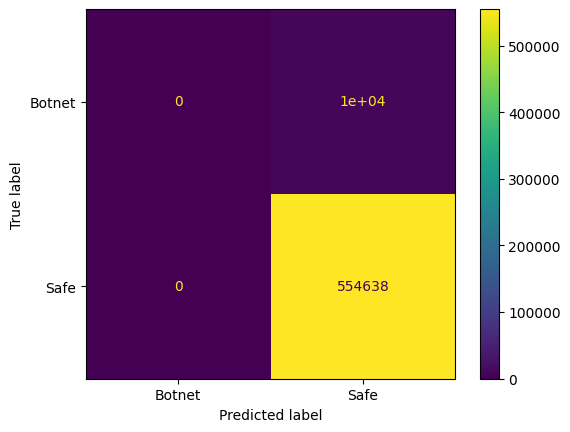

In [293]:
cm = confusion_matrix(test_labels_np, y_pred_quant)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])

cm_display.plot()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  
converter.target_spec.supported_types = [tf.float16]
quantized_model = converter.convert()


with open('quantized_H.tflite', 'wb') as f:
    f.write(quantized_model)

# pruned_model.save('pruned_model.h5')

INFO:tensorflow:Assets written to: C:\Users\espac\AppData\Local\Temp\tmparmoqf5g\assets


INFO:tensorflow:Assets written to: C:\Users\espac\AppData\Local\Temp\tmparmoqf5g\assets


In [295]:
interpreter = tf.lite.Interpreter(model_content=quantized_model)
interpreter.allocate_tensors()

print(f"pruned: {os.path.getsize('pruned_model.h5') / 1024:.1f} KB")
print(f"Quantized: {os.path.getsize('quantized_H.tflite') / 1024:.1f} KB")


pruned: 35.8 KB
Quantized: 6.7 KB


In [296]:
quantized_model = TFLiteModel("quantized_H.tflite")

In [ ]:
X_test = test_features_reduced  
y_pred = quantized_model.predict(X_test)     

y_pred_class = (y_pred >= 0.5).astype(int)

In [ ]:
y_true = test_labels_np
# imputer = SimpleImputer(strategy='mean') 
# X_test = imputer.fit_transform(X_test)
# y_pred = rf_model.predict(X_test)
# y_proba = rf_model.predict_proba(X_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

y_pred_pruned = pruned_model.predict(X_test)
y_pred_or = model.predict(X_test)
# Quantized model (fp16)
y_pred_quant = quantized_model.predict(X_test)

# print("original Accuracy:", accuracy_score(test_labels_np, y_pred_or >= 0.5))
# print("RF Accuracy:", accuracy_score(test_labels_np, y_proba >= 0.5))
print("pruned Accuracy:", accuracy_score(test_labels_np, y_pred_pruned >= 0.5))
print("Quantized Accuracy:", accuracy_score(test_labels_np, y_pred_quant >= 0.5))

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[523868] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse] name: 

In [299]:
y_pred_binary_quant = (y_pred_quant > 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(test_labels_np, y_pred_binary_quant).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

print("Precision:", precision_score(y_true, y_pred_binary_quant))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_true, y_pred_binary_quant))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_binary_quant))

Precision: 0.9988284074928493
TPR (Recall): 0.9438
FPR: 0.0597
F1-Score: 0.970526860299005
AUC-ROC: 0.9420576865567499


In [300]:
start = time.time()
y_pred = quantized_model.predict(test_features_reduced)
latency_ms = (time.time() - start) * 1000 / len(test_features_reduced)
print(f"Latency: {latency_ms:.6f} ms/flow")

Latency: 0.010265 ms/flow


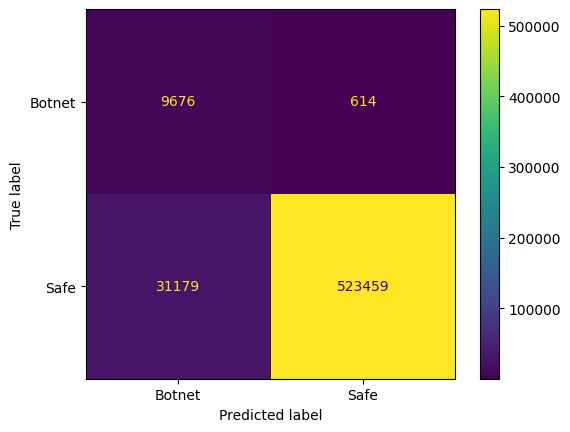

In [301]:
cm = confusion_matrix(test_labels_np, y_pred_binary_quant)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Botnet", "Safe"])

cm_display.plot()
plt.show()

In [304]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [305]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)

X_train shape: (2095472, 3338655), y_train shape: (2095472,)


In [310]:
y_true = test_labels_np
imputer = SimpleImputer(strategy='mean') 
X_test = imputer.fit_transform(X_test)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

print("Precision:", precision_score(y_test, y_pred))
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Precision: 0.9910909689169128
TPR (Recall): 0.9997
FPR: 0.8279
F1-Score: 0.9953610619316005
AUC-ROC: 0.6041470290963891
